# Importing River Arno Dataset

In [19]:
import numpy as np 
import pandas as pd 

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv("acea-water-prediction\River_Arno.csv")
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


<AxesSubplot:>

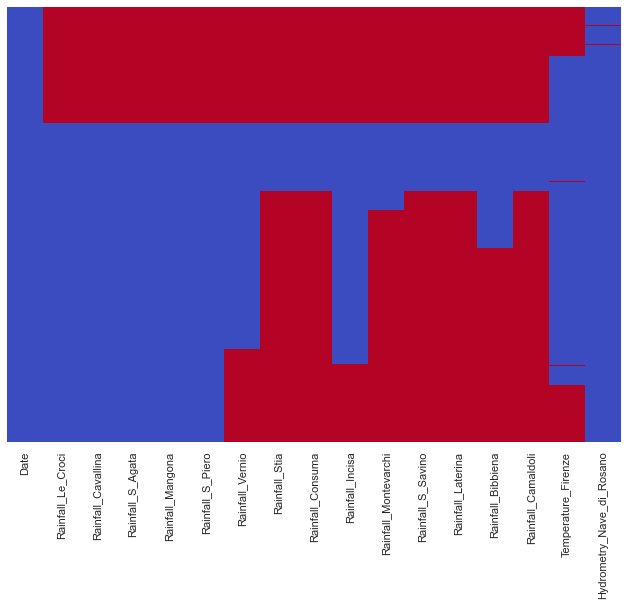

In [20]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

# Missing Data Analysis

In [21]:
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
Date,0
Rainfall_Le_Croci,2191
Rainfall_Cavallina,2191
Rainfall_S_Agata,2191
Rainfall_Mangona,2191
Rainfall_S_Piero,2191
Rainfall_Vernio,3934
Rainfall_Stia,6934
Rainfall_Consuma,6934


In [22]:
#dropping rows before 2004 due to NaN values in multiple columns
df = df[df.Rainfall_Le_Croci.notna()].reset_index(drop=True)
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
1,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
3,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
4,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


In [23]:
# Missing data analysis after dropping rows
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
Date,0
Rainfall_Le_Croci,0
Rainfall_Cavallina,0
Rainfall_S_Agata,0
Rainfall_Mangona,0
Rainfall_S_Piero,0
Rainfall_Vernio,1743
Rainfall_Stia,4743
Rainfall_Consuma,4743


<AxesSubplot:>

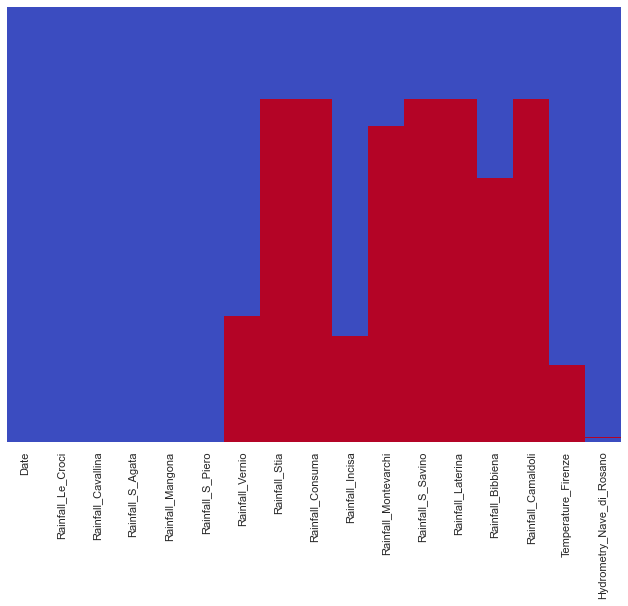

In [25]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

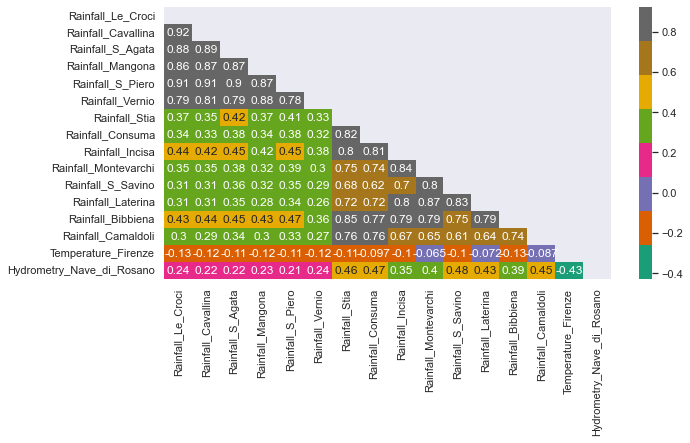

In [26]:
# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

Due to high number of missing values in values (over 44%), we'll use for prediction 'Temperature_Firenze' and the 5 rainfall indicators that have the least missing values: 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero'. We'll also create the 'rainfall_mean' feature.  <br>
These Rainfalls have a higher correlation than the ones that will remain.

In [27]:
RA_pred = df[['Hydrometry_Nave_di_Rosano', 'Temperature_Firenze', 
                      'Rainfall_Le_Croci', 'Rainfall_Cavallina', 
                      'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero']]

#Missing values will be replaced with mean values
RA_pred = RA_pred.apply(lambda x: x.fillna(np.mean(x)))

RA_pred['rainfall_mean'] = RA_pred[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 
                                    'Rainfall_S_Agata', 'Rainfall_Mangona', 
                                    'Rainfall_S_Piero']].mean(axis = 1).values

RA_pred

,Hydrometry_Nave_di_Rosano,Temperature_Firenze,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,rainfall_mean
0,1.84,8.650000,0.0,0.0,0.4,0.0,0.0,0.08
1,1.93,7.100000,0.0,0.0,0.0,0.0,0.0,0.00
2,1.61,5.500000,0.0,0.0,0.0,0.0,0.0,0.00
3,1.35,3.550000,0.0,0.0,0.0,0.0,0.0,0.00
4,1.44,2.700000,0.0,0.0,0.0,0.0,0.2,0.04
...,...,...,...,...,...,...,...,...
6021,1.34,16.523048,0.0,0.0,0.0,0.0,0.0,0.00
6022,1.21,16.523048,0.0,0.0,0.0,0.0,0.0,0.00
6023,1.30,16.523048,0.0,0.0,0.0,0.0,0.0,0.00
6024,1.19,16.523048,0.0,0.0,0.0,0.0,0.0,0.00


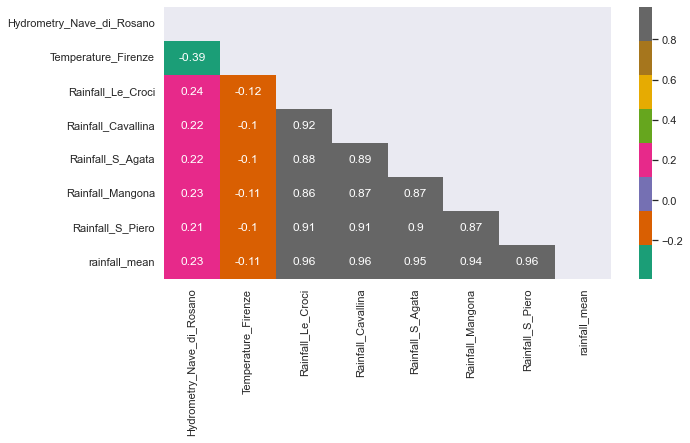

In [28]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(RA_pred.corr(), dtype=bool))
sns.heatmap(RA_pred.corr(), mask = mask, annot=True, cmap='Dark2');

# XGBRegressor Model

In [30]:
from xgboost import XGBRegressor , plot_importance, plot_tree
from sklearn.model_selection import train_test_split

y = RA_pred['Hydrometry_Nave_di_Rosano']
X = RA_pred.drop('Hydrometry_Nave_di_Rosano', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = False)

params = {'n_estimators': 100,
          'max_depth': 4,
          'subsample': 0.7,
          'learning_rate': 0.04,
          'random_state': 0}

model = XGBRegressor(**params)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_pred = model.predict(X_test)

print('MAE value: %.4f' 
      %mean_absolute_error(y_test, y_pred))

MAE value: 0.3613


The Mean Absolute Error of the predicted values is 0.3613.

# Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

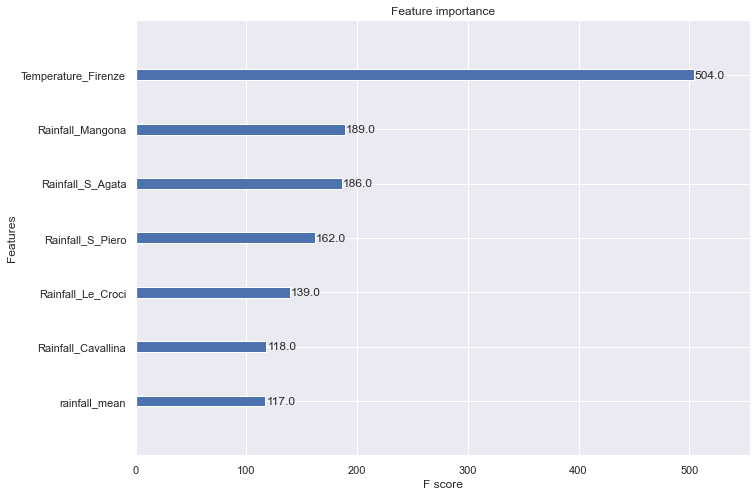

In [18]:
plot_importance(model)

 temperature is the most important feature.